# Research Notebook 3
## Suzanne Parr
## Date: March 11, 2025

# 1: Experience
## Describe at least one research activity you worked on this week. 

1) The quantum parameters $Q_b$ and $Q_c$ are woven into the metric functions f(r), g(r) and h(r) to describe an improved metric which should show what effects quantum physics has on the motion of particles in the vicinity of a black hole. I created 13 values for the quantum parameter $Q_b$ between (and including) 0 and 1. I ran my "find_extrema" function in a loop to get values for r and $V_{\text{eff}}(r)$ for each value of $Q_b$ and put each set of r, $V_{\text{eff}}(r)$, and $Q_b$ values into an array to plot light paths for the improved metric.

2) Before I could reproduce circular orbits, and scattering and plunging scenarios for light rays I had to understand how total energy and effective (gravitational) potential relate. I looked at the "energy equation" which is essentially the expression for $\frac{dr}{d\lambda}$ rearranged to isolate E ($E^2$). The expression on the far left represents kinetic energy, the one to the left of the equals sign is gravitational potential energy and, Total Energy, E is on the far right. We know that for a circular orbit, radial velocity equals zero so the total energy is equal to $V_{\text{eff}}(r)$.

$$
f(r) g(r) \left(\frac{dr}{d\lambda} \right)^2 + f(r) \left(\frac{L^2}{h(r)} + \epsilon \right) = E^2
$$

3) I explored a light ray's trajectory ($\epsilon = 0$ for a massless particle) near a black hole by constraining the value for L (magnitude of the conserved angular momentum) and M (black hole's mass) so that I could plot results for 3 different radial starting points - at precisely the maximum potential, outside this spot moving inwards; and between $r_{\text{sc}}$ and the maximum potential, moving outwards. and different energy levels (E) compared to $V_{\text{eff}}(r)$. For classical Schwarzschild metric a circular orbit is possible at r = 3 * M if the total energy of the particle equals the maximum potential. For a light ray starting outside this - say at r = 5 * M - and moving inwards, the particle will plunge into the black hole if its total energy is greater than the maximum potential or it will escape if E is less than the maximum potential. Inside the maximum potential the reverse is true, the light ray will plunge into the BH with total energy less than the maximum potential and will escape with energy greater than the maximum potential. Next I have to see how quantum effects change these results by recreating these plots with varying values for $Q_b$. $Q_c$ makes a very small contribution so I have set it to zero.

## Motivation:

1) My team is wants to find out quantitatively how quantum physics changes the behaviour of light as well as massive particles (like planets) near a black hole according to the improved metric derived by Saeed Rastgoo and colleagues. In order to do this we must become proficient at plotting trajectories in a classic Schwarzschild black hole system so that when we superimpose the quantum corrections any deviations from the general relativity prediction case can be attributed precisely to quantum effects.

2) The energy equation that springs from the Schwarzschild metric is key to understanding trajectories. If we rearrange the $\frac{dr}{d\lambda}$ relation and solve for total energy E (actually $E^2$) we have an equation resembling newtonian mechanics with a kinetic energy and a gravitational potential energy term. We can set the kinetic energy (radial) term equal to zero at the turning points (maxima) so that the total energy $E^2$ is equivalent to the effective potential equals. 

3) The goal is to solve the equations of motion in the improved metric first with the quantum parameters set to zero, so we can reproduce circular orbit, scattering and plunging plots seen in existing publications on general relativity. Then next to give values to the quantum parameters and see how these orbits change. Solving equations of motion is messy! First the independent variable is the "affine parameter" $\lambda$ which is hard to conceptualize since we have no experience with it in the real world. It's also hard to know how close to the black hole we can venture without experiencing a singularity. Also, the relation $\frac{dr}{d\lambda}$ is wrapped in a square root sign so we have to decide what to do when we get a negative value inside the square root.

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

1) I attempted to reproduce light ray trajectory plots from a publication by James B. Hartle listed below. This included a circular orbit at r = 3 * M, a scattering and plunging trajectory when the light ray travels inwards from greater than 5 * M as well as scattering and plunging trajectories when light begins it's travels at r = 2 * M (very close to the black hole). The behaviour of the light ray - whether it escaped or plunged into the black hole depended on the value of the impact parameter, B, where B = |L/E|. In Hartle, the location of B is placed on a plot of $V_{\text{eff}}(r)$ as a horizontal, dashed line. The relationship of "b" to the maximum potential as seen in a plot of $V_{\text{eff}}(r)$ explained why various orbit scenarios were taking place. 

I found that my plots of $V_{\text{eff}}(r)$ had a larger range of values (0.0 to 0.9) than the ones in Hartle (-0.04 to +0.04) so that when I placed the dashed line representing "b" on my plots it would appear to be very close to the x-axis. I realize that Hartle uses a version of $V_{\text{eff}}(r)$ that doesn't include $L^2$ like the version we have been working with,

$$V_{\text{eff}}(r) = f(r) \left( \frac{L^2}{h(r)} + \epsilon \right)$$

I soon realized that I didn't have to mirror the plots done in Hartle but could make my own taking into account the trade-off between gravitational potential and kinetic energy at the point a particle in a "circular" orbit changes direction - at the turning points or at perihelion and aphelion in an elliptical orbit. The dashed horizontal line that I placed on each plot of $V_{\text{eff}}(r)$ represents the total energy and not the impact parameter, b. Once I realized that the relationship between $V_{\text{eff}}(r)$ and total energy, E, is what really matters I started to make real progress.

2) I realized the $Q_c$ has little to know impact on light paths so I can set it to a very small number (zero) and see what changes when I vary $Q_b$. I learned that when I increase $Q_b$ from 0 to 1 extrema shift further and further left and have larger and larger values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.integrate import solve_ivp
import sympy as sp
import OGRePy as gr
# assign r as a symbol
r = gr.sym('r', nonnegative=True)

**OGRePy: An <u>O</u>bject-Oriented <u>G</u>eneral <u>Re</u>lativity Package for <u>Py</u>thon\
By [Barak Shoshany](https://github.com/bshoshany) ([baraksh@gmail.com](mailto:baraksh@gmail.com)) ([baraksh.com](https://baraksh.com/))\
v1.3.0 (2025-02-04)\
GitHub repository: <https://github.com/bshoshany/OGRePy>\
Documentation: <a href="c:/Users/suzan/AppData/Local/Programs/Python/Python312/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.ipynb">.ipynb</a>, <a href="c:/Users/suzan/AppData/Local/Programs/Python/Python312/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.pdf">.pdf</a>, <a href="#" onclick="window.open('file:///c:/Users/suzan/AppData/Local/Programs/Python/Python312/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.html', '_blank')">.html</a>**

**OGRePy**: You have the latest version of the package.

# Improved Metric with Quantum Corrections

Here we define improved metric functions that work within the classical SC framework,

$$ ds^2 = - f(r) \, dt^2 + g(r) \, dr^2 + h(r) \left( d\theta^2 + \sin^2\theta \, d\phi^2 \right) $$

As with the SC metric the improved metric represents a static, spherically symmetric spacetime. Spherical symmetry means we can confine the direction of angular momentum to $\theta = \frac{\pi}{2}$ and the magnitude, defined as $L = h(r) \frac{d\phi}{d\lambda}$, is conserved. The metric is independent of 't' so energy, defined as, $E = f(r) \frac{dt}{d\lambda}$ is also conserved. If we integrate once we get expressions for $\dot{t}$, $\dot{r}^2$ and $\dot{\phi}$ in terms of the metric functions, the conserved quantities, E and L and $\epsilon$ (0 for null and 1 for time-like geodesics). If we re-arrange the radial component to isolate $E^2$ we can "read off" the Effective Potential,

$$V_{\text{eff}}(r) = f(r) \left( \frac{L^2}{h(r)} + \epsilon \right)$$

an expression that is comparable to Newtonian gravitational potential energy. Below we define the metric functions, Effective Potential, and Equations of Motion for the improved metric.

In [2]:
# get schwarzschild radius from mass
def r_sc(M):
    return (2*M)

# schwarzschild metric functions (dependent on radial coordinate, r, SC radius and quantum corrections, Q_b, Q_c)
def f(r, M, Q_b, Q_c):
    return (1 + Q_b/r**2) * (1 + (Q_c*(2*M)**2)/(4*r**8))**(-1/4) * (1-(2*M)/(gr.s.sqrt(r**2+Q_b)))

def g(r, M, Q_b, Q_c):
    return (1 + (Q_c*(2*M)**2)/(4*r**8))**(1/4) * (1-(2*M)/(gr.s.sqrt(r**2+Q_b)))**(-1)

def h(r, M, Q_c):
    return r**2 * (1 + (Q_c*(2*M)**2)/(4*r**8))**(1/4)

# effective potential
def v_eff(r, M, L, Q_b, Q_c, epsilon=0):
    return f(r, M, Q_b, Q_c) * (L**2/h(r, M, Q_c) + epsilon)

def E_at_vmax(v_max):
    return gr.s.sqrt(max(0, v_max))

# lamda can be replaced by tau for massive particles
def eq_of_motion(lamda, y, params, epsilon=0):

    t, r, phi = y
    E, L, M, Q_b, Q_c = params

    dt_dlamda = E / f(r, M, Q_b, Q_c)
    dphi_dlamda = L / h(r, M, Q_c)
    squared = g(r, M, Q_b, Q_c)**(-1) * (E**2 / f(r, M, Q_b, Q_c) + (epsilon - L**2 / h(r, M, Q_c)))
    dr_dlamda = gr.s.sqrt(max(squared, 0))  # ensure non-negative input

    return [dt_dlamda, dr_dlamda, dphi_dlamda]

# Assign Values to Constants

Assign values for Mass (M) of central massive object, Angular momentum (L) of the orbiting particle, a test value of Energy (E) and a set of values for the quantum parameters (QM) to see how quantum effects change effective potential.

In [7]:
M1 = 1.0  
rs1 = r_sc(M1)
L1 = 4.3 # angular momentum of orbiting particle
E1 = 1.0 # test value of particle total energy
Q_b0 = 0.0
Q_b1 = 0.25
Q_b2 = 0.5
Q_b3 = 0.75
Q_b4 = 1.0
Q_c0 = 0.0
Q_c1 = 0.25
Q_c2 = 0.5
Q_c3 = 0.75
Q_c4 = 1.0

# Extrema

We find extrema by setting $\frac{dV_{\text{eff}}}{dr} = 0$ and solving for the (real) roots - values of 'r' where the slope of the effective potential is '0'.

In the case of light ($\epsilon = 0$) there is only a maximum at r = 3 * M when the quantum corrections (QM) = 0.

What follows is a function "find_extrema" that uses OGRePy's numerical function, nsolve to find the roots. For the case of light ($\epsilon = 0$) and a chosen value of angular momentum, L = 4.3 - a number that worked well - we can find the radial position, r, and value of $V_{\text{eff}}(r)$ at the maxima for a range of 13 $Q_b$ values between 0 and 1. Next "find_extrema" is run in a loop saving the $Q_b$ value and r, and $V_{\text{eff}}(r)$ values in an array for subsequent use in plotting trajectories. For this study we can ignore $Q_c$ (set it equal to 0) since $Q_b$ has a much larger effect and $Q_c$ is negligable by comparison. 

Finally we plot $V_{\text{eff}}(r)$ for L = 4.3 and at 13 $Q_b$ values with maximum potential (maxima) marked on the plot.

In [8]:
# extrema are found using OGRePy 'nsolve' numerically.
def find_extrema(M_val, L_val, Q_b_val, Q_c_val, eps_val, r_range):
    v_eff = f(r, M_val, Q_b_val, Q_c_val) * (L_val**2 / h(r, M_val, Q_c_val) + eps_val)

    # first derivative with respect to r
    dv_eff_dr = gr.s.diff(v_eff, r)
    # second derivative with respect to r
    d2v_eff_dr2 = gr.s.diff(dv_eff_dr, r)

    extrema = []
    # solve dv_eff_dr = 0 for a range of initial guesses
    for r_init in np.linspace(r_range[0], r_range[1], 50):
        try:
            root = gr.s.nsolve(dv_eff_dr, r, r_init)
            root = float(root)
            if not any(np.isclose(root, ext, atol=1e-6) for ext in extrema) and r_range[0] <= root <= r_range[1]:
                extrema.append(root) # ensure no "very close" extrema (tolerance of 10^-6); only pick values within the chosen r range. 
        except Exception:
            pass  # skip guess if nsolve fails

    extrema_results = []
    print(f"\nExtrema for ε = {eps_val}, M = {M1}, L = {L_val}, Q_b = {Q_b_val}, Q_c = {Q_c_val}:")
    for r_ex in extrema:
        v_eff_at_r = v_eff.subs(r, r_ex).evalf()  # evaluate symbolic function at values of r that rep extrema
        d2v_eff_dr2_r_ex = d2v_eff_dr2.subs(r, r_ex).evalf()  # 2nd derivative at extrema
        extrema_type = "min" if d2v_eff_dr2_r_ex > 0 else "max"
        extrema_results.append((r_ex, v_eff_at_r, extrema_type))
        print(f"r = {r_ex:.4f}, v_eff = {v_eff_at_r:.4f}, Type: {extrema_type}")

    return extrema_results, v_eff


Extrema for ε = 0, M = 1.0, L = 4.3, Q_b = 0.0, Q_c = 0.0:
r = 3.0000, v_eff = 0.6848, Type: max

Extrema for ε = 0, M = 1.0, L = 4.3, Q_b = 0.08333333333333333, Q_c = 0.0:
r = 2.9674, v_eff = 0.6978, Type: max

Extrema for ε = 0, M = 1.0, L = 4.3, Q_b = 0.16666666666666666, Q_c = 0.0:
r = 2.9345, v_eff = 0.7112, Type: max

Extrema for ε = 0, M = 1.0, L = 4.3, Q_b = 0.25, Q_c = 0.0:
r = 2.9012, v_eff = 0.7253, Type: max

Extrema for ε = 0, M = 1.0, L = 4.3, Q_b = 0.3333333333333333, Q_c = 0.0:
r = 2.8675, v_eff = 0.7400, Type: max

Extrema for ε = 0, M = 1.0, L = 4.3, Q_b = 0.41666666666666663, Q_c = 0.0:
r = 2.8334, v_eff = 0.7553, Type: max

Extrema for ε = 0, M = 1.0, L = 4.3, Q_b = 0.5, Q_c = 0.0:
r = 2.7989, v_eff = 0.7714, Type: max

Extrema for ε = 0, M = 1.0, L = 4.3, Q_b = 0.5833333333333333, Q_c = 0.0:
r = 2.7639, v_eff = 0.7882, Type: max

Extrema for ε = 0, M = 1.0, L = 4.3, Q_b = 0.6666666666666666, Q_c = 0.0:
r = 2.7286, v_eff = 0.8058, Type: max

Extrema for ε = 0, M = 

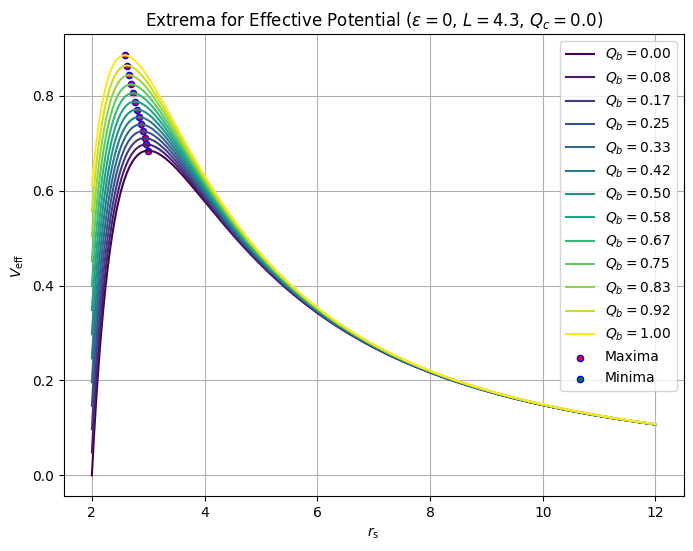

In [10]:
r_range = (rs1, 6 * rs1)
eps0 = 0

Q_b_vals = np.linspace(0, 1.0, 13)
colors = plt.cm.viridis(np.linspace(0, 1, len(Q_b_vals)))
plt.figure(figsize=(8, 6))
max_x, max_y, min_x, min_y = [], [], [], []

# array to store extrema data: r, v_eff, E(at max), Q_b
extrema_data = []

for Q_b, color in zip(Q_b_vals, colors):
    extrema, v_eff_func = find_extrema(M1, L1, Q_b, Q_c0, eps0, r_range)
    r_vals1 = np.linspace(r_range[0], r_range[1], 1000)
    v_eff_func_num = sp.lambdify(r, v_eff_func, "numpy")
    v_eff_vals = v_eff_func_num(r_vals1)
    plt.plot(r_vals1, v_eff_vals, color=color, label=rf'$Q_b={Q_b:.2f}$')
    for r_ex, v_eff_at_r, ext_type in extrema:
        extrema_data.append((r_ex, v_eff_at_r, Q_b))
        if ext_type == "max":
            max_x.append(r_ex)
            max_y.append(v_eff_at_r)
        else:
            min_x.append(r_ex)
            min_y.append(v_eff_at_r)

plt.scatter(max_x, max_y, color='r', s=20, edgecolors='b', label="Maxima")
plt.scatter(min_x, min_y, color='g', s=20, edgecolors='b', label="Minima")
plt.xlabel(r'$r_{\mathrm{s}}$')
plt.ylabel(r'$V_{\mathrm{eff}}$')
plt.title(rf"Extrema for Effective Potential ($\varepsilon={eps0}$, $L={L1}$, $Q_c={Q_c0}$)")
plt.legend()
plt.grid(True)
plt.show()

# NumPy array with extrema data including: r, v_eff, Q_b val
extrema_array = np.array(extrema_data)


# Orbits

In this approach we solve for $r(\lambda)$ and $\phi(\lambda)$ by integrating the equations of motion $\frac{dr}{d\lambda}$ and $\frac{d\phi}{d\lambda}$ with 'solve_ivp' and $\lambda$ as the independent variable. This results in a list of values which can be converted to cartesian coordinates to plot y(x). We can change direction of $\frac{dr}{d\lambda}$ to list values moving inwards or heading outwards. 

Next we learn the importance of extrema. What follows is the "energy equation" we get by substituting conserved entities, L and E into the equation for $\frac{dr}{d\lambda}$ and rearranging terms,

$$
f(r) g(r) \left(\frac{dr}{d\lambda} \right)^2 + f(r) \left(\frac{L^2}{h(r)} + \epsilon \right) = E^2
$$

The 1st term corresponds to kinetic energy and 2nd term corresponds to gravitational potential energy with total energy ($E^2$) on the right-hand side. At the turning points in a circular orbit radial velocity (therefore kinetic energy) equals zero and the total energy is 100% equal to potential energy.

In the following code block we define the solver function, 'solve_geodesic', then we set 5 sets of initial conditions (all for $Q_b$ = 0 or classical Schwarzschild metric), run the solver, and plot each trajectory together with a plot of $V_{\text{eff}}(r)$ beside it showing the relationship between effective potential and total energy.

In [11]:
def solve_geodesic(r_init, phi_init, t_init, lam_range, params, epsilon=0, inward=False):
    E, L, M, Q_b, Q_c = params  

    # initial conditions [t, r, phi]
    y0 = [t_init, r_init, phi_init]

    def dy_dt(lam, y):
        r = y[1]
        
        # stop integration if r <= Schwarzschild radius
        if r <= 2 * M + 1e-3:
            return [0, 0, 0] 

        dt_dlam, dr_dlam, dphi_dlam = eq_of_motion(lam, y, params, epsilon)

        if inward:
            dr_dlam = -abs(dr_dlam)  # dr/dλ is negative for inward motion
        else:
            dr_dlam = abs(dr_dlam)   # dr/dλ is positive for outward motion

        return [dt_dlam, dr_dlam, dphi_dlam]

    # solve for t(λ), r(λ), and φ(λ)
    sol = solve_ivp(dy_dt, lam_range, y0, t_eval=np.linspace(*lam_range, 1000), atol=1e-6, rtol=1e-6)
    
    return sol

# Light Ray Paths for a classical Schwarzschild metric

For M = 1.0 and L = 4.3 there is a circular orbit at 3 * M exactly at the effective potential maxima. If our light ray begins a path outside 3 * M (lets say at 5 times $r_{\text{sc}}$) and travels inwards, the light ray will be scattered after a turning point, if it has energy less than the maximum potential or it will plunge into the BH with energy greater than the maximum potential. Conversely, if the light ray begins between $r_{\text{sc}}$ and 3 * M, say at 2.4 * M, it will escape with energy greater than the maximum potential and plunge into the black hole with energy less than the maximum potential.

In the last (5th) plot with total energy less than the maximum potential, the light ray should plunge into the black hole. I couldn't get my trajectory to plunge...it is constrained to a circular orbit. I will have to re-visit this plot.

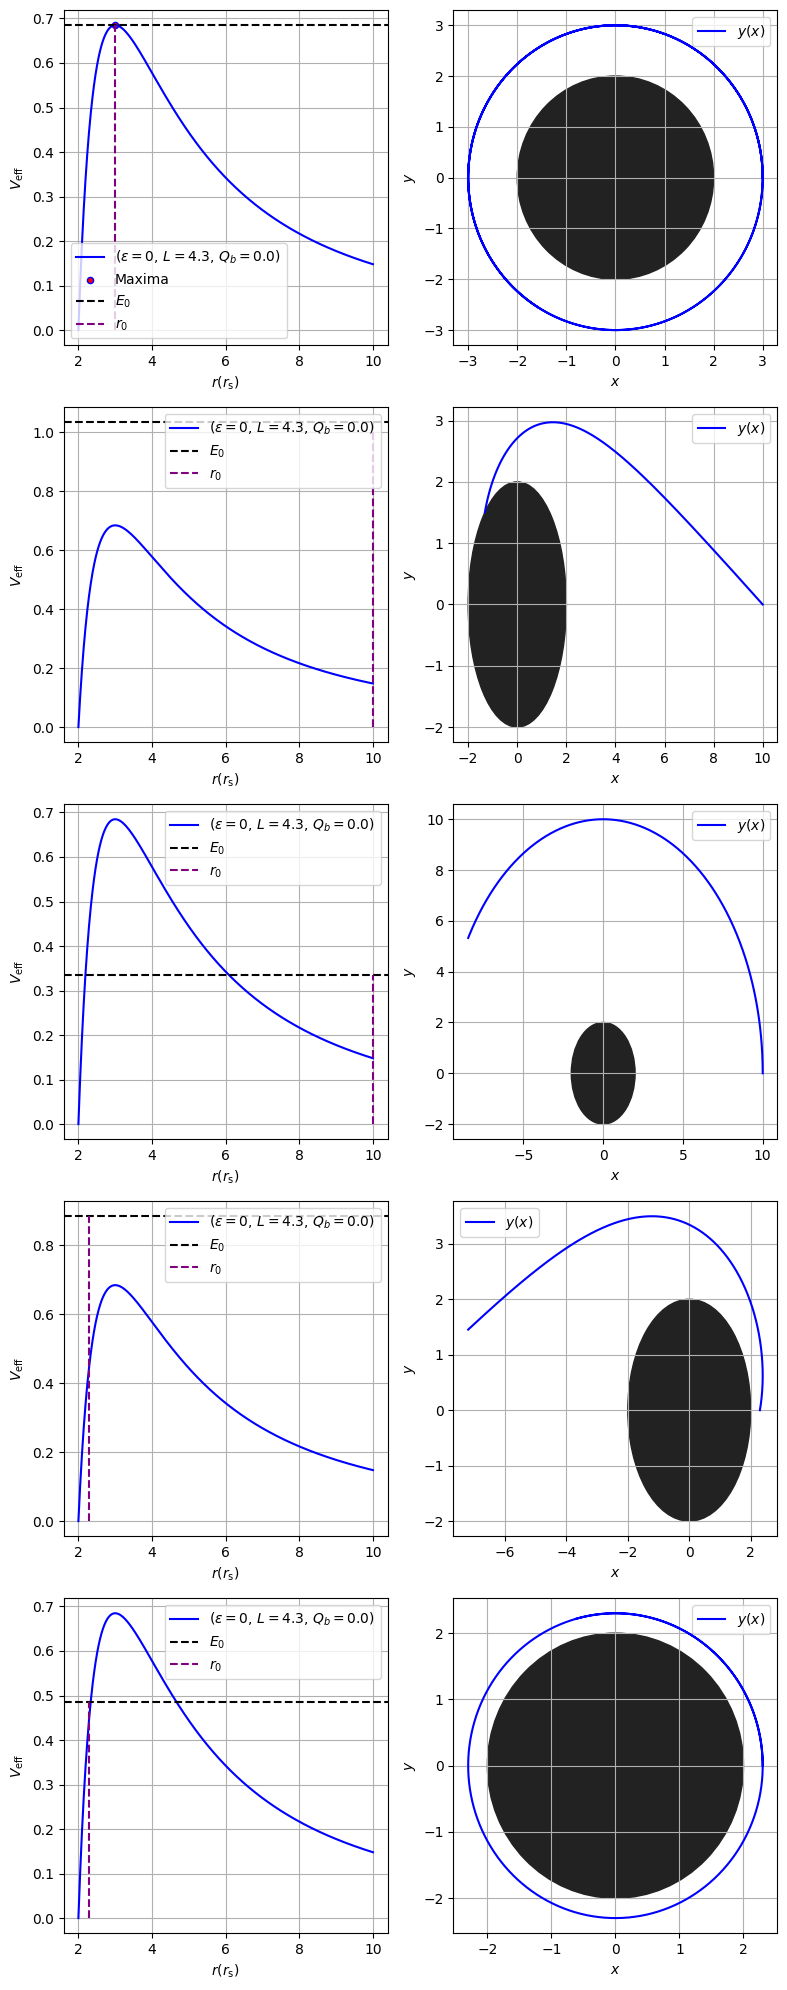

In [12]:
# same for all light particles around a SC black hole
Qb0 = extrema_array[0, 2]
Qc0 = 0.0
phi0 = 0
t0 = 0
lam_range_0 = [0, 10]
lam_range_1 = [0, 35]
lam_range_2 = [0, 60]
r0 = 5 * rs1
r_circ0 = 3 * M1
r_inside0 = 2.3 * M1

#----------- circular orbit
# parameters that change
E0_1 = extrema_array[0, 1] #v_eff at max (= E**2)
params1 = (E0_1, L1, M1, Qb0, Qc0)

r_vals0 = np.linspace(rs1, 5*rs1, 1000)
v_eff0 = np.array([v_eff(i, M1, L1, Qb0, Qc0, epsilon=0) for i in r_vals0])

# sol_outward = solve_geodesic(r_init, phi_init, t_init, lam_range, params)
sol_in_1 = solve_geodesic(r_circ0, phi0, t0, lam_range_1, params1, inward=True)

t_vals_1 = sol_in_1.y[0]
r_vals_1 = sol_in_1.y[1]
phi_vals_1 = sol_in_1.y[2]

# cartesian coordinates
x_vals_1 = r_vals_1 * np.cos(phi_vals_1)
y_vals_1 = r_vals_1 * np.sin(phi_vals_1)

#---------- E greater than circular -------------
E0_2 = E0_1 + 0.35
params2 = (E0_2, L1, M1, Qb0, Qc0)

# sol_outward = solve_geodesic(r_init, phi_init, t_init, lam_range, params)
sol_in_2 = solve_geodesic(r0, phi0, t0, lam_range_2, params2, inward=True)

t_vals_2 = sol_in_2.y[0]
r_vals_2 = sol_in_2.y[1]
phi_vals_2 = sol_in_2.y[2]

# cartesian coordinates
x_vals_2 = r_vals_2 * np.cos(phi_vals_2)
y_vals_2 = r_vals_2 * np.sin(phi_vals_2)

#---------- E less than circular -------------
E0_3 = E0_1 - 0.35
params3 = (E0_3, L1, M1, Qb0, Qc0)

# sol_outward = solve_geodesic(r_init, phi_init, t_init, lam_range, params)
sol_in_3 = solve_geodesic(r0, phi0, t0, lam_range_2, params3, inward=True)

t_vals_3 = sol_in_3.y[0]
r_vals_3 = sol_in_3.y[1]
phi_vals_3 = sol_in_3.y[2]

# cartesian coordinates
x_vals_3 = r_vals_3 * np.cos(phi_vals_3)
y_vals_3 = r_vals_3 * np.sin(phi_vals_3)

#---------- From inside - E greater than circular -------------
E0_4 = E0_1 + 0.20
params4 = (E0_4, L1, M1, Qb0, Qc0)

sol_out_4 = solve_geodesic(r_inside0, phi0, t0, lam_range_0, params4)
# sol_inward = solve_geodesic(r0, phi0, t0, lam_range_2, params3, inward=True)

t_vals_4 = sol_out_4.y[0]
r_vals_4 = sol_out_4.y[1]
phi_vals_4 = sol_out_4.y[2]

# cartesian coordinates
x_vals_4 = r_vals_4 * np.cos(phi_vals_4)
y_vals_4 = r_vals_4 * np.sin(phi_vals_4)

#---------- From inside - E less than circular -------------
E0_5 = E0_1 - 0.20
params5 = (E0_5, L1, M1, Qb0, Qc0)

# sol_out_5 = solve_geodesic(r_inside0, phi0, t0, lam_range_1, params5)
sol_in_5 = solve_geodesic(r_inside0, phi0, t0, lam_range_0, params5, inward=True)

t_vals_5 = sol_in_5.y[0]
r_vals_5 = sol_in_5.y[1]
phi_vals_5 = sol_in_5.y[2]

# cartesian coordinates
x_vals_5 = r_vals_5 * np.cos(phi_vals_5)
y_vals_5 = r_vals_5 * np.sin(phi_vals_5)

#--------- Plots -------------
fig, axes = plt.subplots(5, 2, figsize=(8, 20))

# First plot
axes[0, 0].plot(r_vals0, v_eff0, label=rf"($\varepsilon={eps0}$, $L={L1}$, $Q_b={Qb0}$)", color='b')
axes[0, 0].scatter(extrema_array[0,0], extrema_array[0,1], color='r', s=20, edgecolors='b', label="Maxima")
axes[0, 0].axhline(y=E0_1, color='black', linestyle='--', label=r'$E_0$')
axes[0, 0].vlines(x=r_circ0, ymin=min(v_eff0), ymax=E0_1, color='purple', linestyle='--', label=r'$r_0$')
axes[0, 0].set_xlabel(r'$r(r_{\mathrm{s}})$')
axes[0, 0].set_ylabel(r'$V_{\mathrm{eff}}$')
axes[0, 0].legend()
axes[0, 0].grid()

# Second plot
axes[0, 1].plot(x_vals_1, y_vals_1, label=r'$y(x)$', color='blue')
circle_0 = patches.Circle((0, 0), 2*M1, color='#222222', alpha=1.0)
axes[0, 1].add_patch(circle_0)
axes[0, 1].set_xlabel(r'$x$')
axes[0, 1].set_ylabel(r'$y$')
axes[0, 1].legend()
axes[0, 1].grid()

# Third plot
axes[1, 0].plot(r_vals0, v_eff0, label=rf"($\varepsilon={eps0}$, $L={L1}$, $Q_b={Qb0}$)", color='b')
axes[1, 0].axhline(y=E0_2, color='black', linestyle='--', label=r'$E_0$')
axes[1, 0].vlines(x=r0, ymin=min(v_eff0), ymax=E0_2, color='purple', linestyle='--', label=r'$r_0$')
axes[1, 0].set_xlabel(r'$r(r_{\mathrm{s}})$')
axes[1, 0].set_ylabel(r'$V_{\mathrm{eff}}$')
axes[1, 0].legend()
axes[1, 0].grid()

# Fourth plot
axes[1, 1].plot(x_vals_2, y_vals_2, label=r'$y(x)$', color='blue')
circle_1 = patches.Circle((0, 0), 2*M1, color='#222222', alpha=1.0)
axes[1, 1].add_patch(circle_1)
axes[1, 1].set_xlabel(r'$x$')
axes[1, 1].set_ylabel(r'$y$')
axes[1, 1].legend()
axes[1, 1].grid()

# Fifth plot
axes[2, 0].plot(r_vals0, v_eff0, label=rf"($\varepsilon={eps0}$, $L={L1}$, $Q_b={Qb0}$)", color='b')
axes[2, 0].axhline(y=E0_3, color='black', linestyle='--', label=r'$E_0$')
axes[2, 0].vlines(x=r0, ymin=min(v_eff0), ymax=E0_3, color='purple', linestyle='--', label=r'$r_0$')
axes[2, 0].set_xlabel(r'$r(r_{\mathrm{s}})$')
axes[2, 0].set_ylabel(r'$V_{\mathrm{eff}}$')
axes[2, 0].legend()
axes[2, 0].grid()

# 6th plot
axes[2, 1].plot(x_vals_3, y_vals_3, label=r'$y(x)$', color='blue')
circle_2 = patches.Circle((0, 0), 2*M1, color='#222222', alpha=1.0)
axes[2, 1].add_patch(circle_2)
axes[2, 1].set_xlabel(r'$x$')
axes[2, 1].set_ylabel(r'$y$')
axes[2, 1].legend()
axes[2, 1].grid()

# 7th plot
axes[3, 0].plot(r_vals0, v_eff0, label=rf"($\varepsilon={eps0}$, $L={L1}$, $Q_b={Qb0}$)", color='b')
axes[3, 0].axhline(y=E0_4, color='black', linestyle='--', label=r'$E_0$')
axes[3, 0].vlines(x=r_inside0, ymin=min(v_eff0), ymax=E0_4, color='purple', linestyle='--', label=r'$r_0$')
axes[3, 0].set_xlabel(r'$r(r_{\mathrm{s}})$')
axes[3, 0].set_ylabel(r'$V_{\mathrm{eff}}$')
axes[3, 0].legend()
axes[3, 0].grid()

# 8th plot
axes[3, 1].plot(x_vals_4, y_vals_4, label=r'$y(x)$', color='blue')
circle_3 = patches.Circle((0, 0), 2*M1, color='#222222', alpha=1.0)
axes[3, 1].add_patch(circle_3)
axes[3, 1].set_xlabel(r'$x$')
axes[3, 1].set_ylabel(r'$y$')
axes[3, 1].legend()
axes[3, 1].grid()

# 9th plot
axes[4, 0].plot(r_vals0, v_eff0, label=rf"($\varepsilon={eps0}$, $L={L1}$, $Q_b={Qb0}$)", color='b')
axes[4, 0].axhline(y=E0_5, color='black', linestyle='--', label=r'$E_0$')
axes[4, 0].vlines(x=r_inside0, ymin=min(v_eff0), ymax=E0_5, color='purple', linestyle='--', label=r'$r_0$')
axes[4, 0].set_xlabel(r'$r(r_{\mathrm{s}})$')
axes[4, 0].set_ylabel(r'$V_{\mathrm{eff}}$')
axes[4, 0].legend()
axes[4, 0].grid()

# 10th plot
axes[4, 1].plot(x_vals_5, y_vals_5, label=r'$y(x)$', color='blue')
circle_4 = patches.Circle((0, 0), 2*M1, color='#222222', alpha=1.0)
axes[4, 1].add_patch(circle_4)
axes[4, 1].set_xlabel(r'$x$')
axes[4, 1].set_ylabel(r'$y$')
axes[4, 1].legend()
axes[4, 1].grid()

plt.tight_layout()
plt.show()

# 4. Now what? (What's next?)
## Plan for the next week

Next steps: to reproduce the 5 scenarios above for the improved metric i.e. with 12 different values for $Q_b$ from 0.08 to 1.00. Each value will produce a different maximum potential and at a different "r" value.

Once the light orbits are complete the team will split our tasks between solving for orbital precession, time dilation and lensing. These are all predicted by general relativity. We will learn how the improved metric - with quantum effects - alters these results.

# 5. References

EXPLORE - Draft, Saeed Rastgoo, 2024.

Gravity: An Introduction to Einstein's General Relativity - James B. Hartle, Pearson Education Inc., 2003.

ChatGPT - LaTeX mark-up for symbols and equations.